In [32]:
from PIL.ExifTags import TAGS
import pathlib
import csv
import glob
from pathlib import Path
from PIL import Image
import pandas as pd
import os
from datetime import time
from matplotlib import markers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib
import seaborn as sns
import scipy
from statsmodels.graphics.gofplots import qqplot


In [131]:
path = 'C:/Users/srboval1/OneDrive - Aalto University/Collab/Ivaska_collab/data/'

# Recursively loading
gradient_data = pd.read_csv(path + "mm.csv")

gradient_data.columns

Index(['status', 'cell_line', 'rad_time', 'bead_size', 'day', 'sample',
       'holder', 'location', 'track_id', 'distance(um)', 'Cov_Sum', 'a_(um)',
       'phi_(rad)', 'c', 'd', 'G_abs', 'radius_(m)', 'rmse', 'inv.rmse',
       'shift_(s)', 'a_error', 'phi_error', 'c_error', 'd_error', 'x', 'y',
       'repeat', 'phi_(deg)', 'tan_phi'],
      dtype='object')

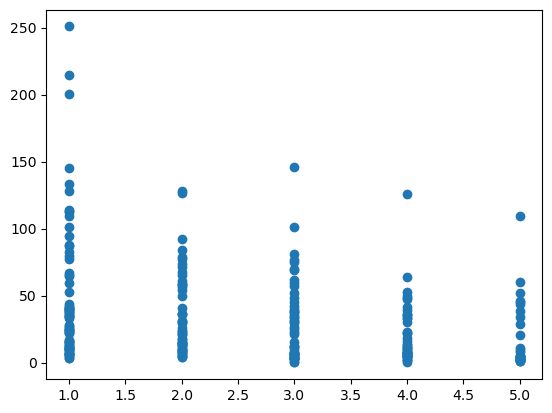

In [133]:
plt.scatter(gradient_data['location'],gradient_data['G_abs'])

In [27]:
scipy.stats.normaltest(gradient_data['G_abs'])

NormaltestResult(statistic=146.75963512553813, pvalue=1.3537864078458811e-32)

Text(0.5, 1.0, 'Q-Q plot')

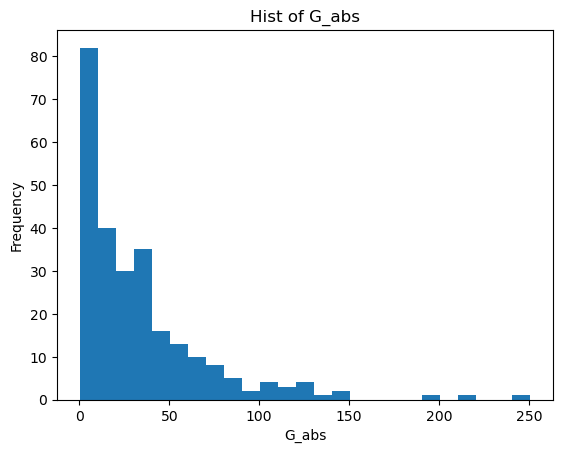

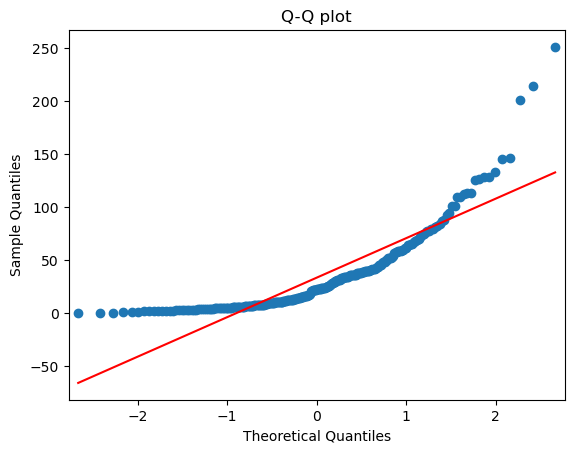

In [78]:
plt.hist((gradient_data['G_abs']), bins=25)
plt.title('Hist of G_abs')
plt.xlabel('G_abs')
plt.ylabel('Frequency')

qqplot((gradient_data['G_abs']), line='s') #quantile-quantile plot
plt.title('Q-Q plot')


Normality check for log_transformed data - better

Text(0.5, 1.0, 'Log Q-Q plot')

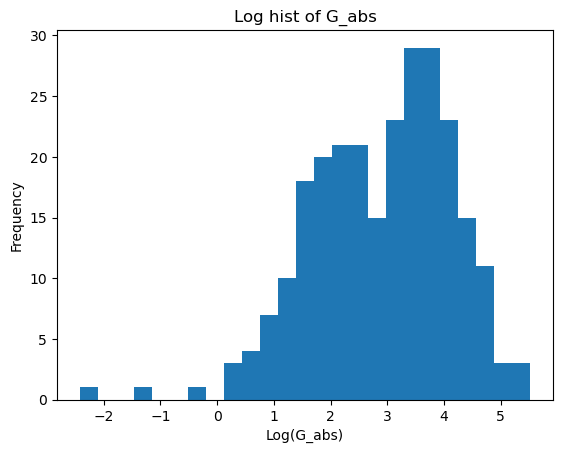

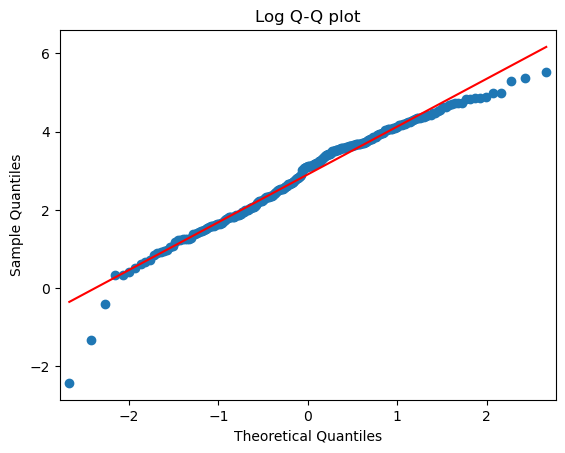

In [79]:
plt.hist(np.log(gradient_data['G_abs']), bins=25)
plt.title('Log hist of G_abs')
plt.xlabel('Log(G_abs)')
plt.ylabel('Frequency')

qqplot(np.log(gradient_data['G_abs']), line='s') #quantile-quantile plot
plt.title('Log Q-Q plot')


LinReg model on log transformed data

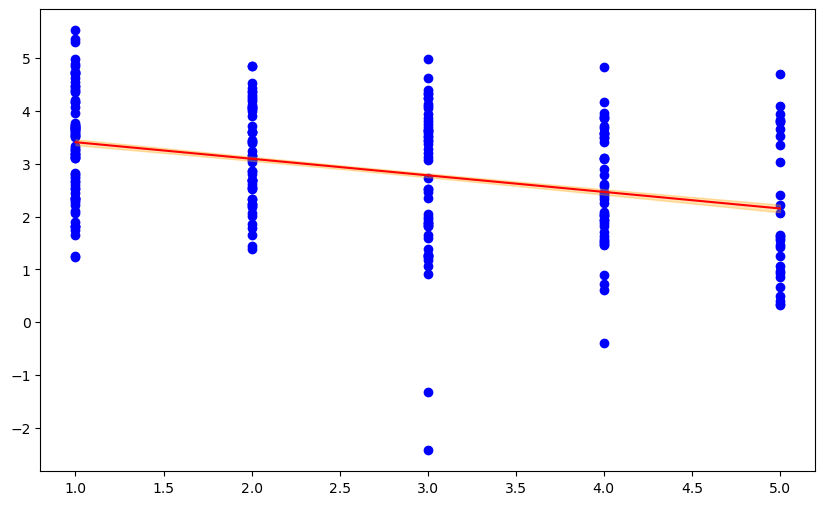

In [146]:
from sklearn.linear_model import LinearRegression

x= gradient_data['location'].values.reshape(-1,1)
y= np.log(gradient_data['G_abs'])

#Fitting the model to the data
model = LinearRegression().fit(x,y) 

#Model prediction based on the original data
predicted_y = model.predict(x) 

# Generate predictions for the original data
predicted_y = model.predict(x)  # Predictions based on the original

# List of residuals: deviation of predicted data from original
residuals = y - predicted_y

# RSS: sum of squared residuals
rss = np.sum(residuals ** 2)           
# Degrees of freedom: sample size - number of parameters we’re trying to estimate.
dof = len(y) - 2
# Residual standard error    
RSE = np.sqrt(rss / dof)  # Corrected calculation

# LinReg model generates predictions for the new x values
def f(x):
    return model.coef_[0] * x + model.intercept_

x_pred = np.linspace(x.min(), x.max(), 100)    # Model x-space
y_pred = f(x_pred)              # Prediction of y based on the model

# Standard error of the regression line
se = RSE * np.sqrt(1/len(y) + (x_pred.flatten() - np.mean(x.flatten()))**2 / np.sum((x.flatten() - np.mean(x.flatten()))**2))

# Calculate the confidence intervals
t_value = 1.90  # For a 95% confidence interval
ci_lower = y_pred - t_value * se
ci_upper = y_pred + t_value * se

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_pred, y_pred, color='red', label='Regression Line')
plt.fill_between(x_pred.flatten(), ci_lower, ci_upper, color='orange', alpha=0.3, label='Confidence Interval')



Linear regresion on the data with seaborn regplot

<Axes: xlabel='location', ylabel='G_abs'>

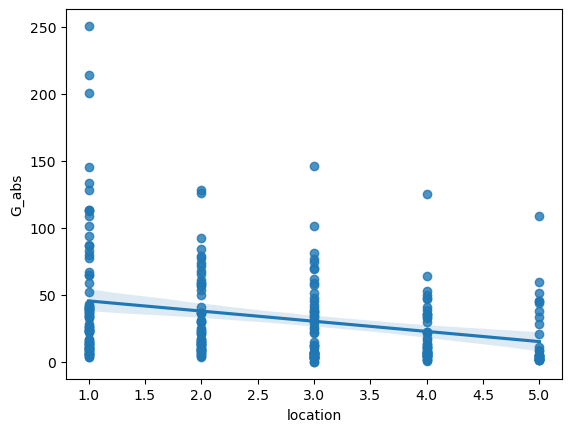

In [59]:
x= gradient_data['location']
y= gradient_data['G_abs']
sns.regplot(x=gradient_data['location'], y=gradient_data['G_abs'])
